In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

sns.set_style(style='darkgrid')
%matplotlib inline
warnings.filterwarnings(action='ignore')

In [2]:
# Getting the data
data = pd.read_csv("./data/raw/FIN_DATA.csv")

In [3]:
# Getting a copy of the data to work with
fin_data_df = data.copy()

In [4]:
# Looking at the head of the data
fin_data_df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
# Getting the information of the data
fin_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


# Data Wrangling

In [6]:
# checking for null values in the dataset
fin_data_df.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [7]:
# Checking for duplicated values
fin_data_df.duplicated().sum()

0

In [8]:
# dropping the id column since it will not be used for any analyses
fin_data_df = fin_data_df.drop(columns='uniqueid')

In [9]:
# Convert 'year' to datetime
fin_data_df['year'] = pd.to_datetime(fin_data_df['year'], format='%Y').dt.year

In [10]:
# Creating a function to group ages
def age_group(age):
    if age < 18:
        return '1-17'
    elif 18 < age <= 35:
        return '18-35'
    elif 35 < age <= 60:
        return '36-60'
    else:
        return '60+'


# Creating a new column called age_group
fin_data_df['age_group'] = fin_data_df['age_of_respondent'].apply(age_group)

In [11]:
# Getting unique values of each column to know whether new columns can be created
fin_data_df.nunique()

country                    4
year                       3
bank_account               2
location_type              2
cellphone_access           2
household_size            20
age_of_respondent         85
gender_of_respondent       2
relationship_with_head     6
marital_status             5
education_level            6
job_type                  10
age_group                  4
dtype: int64

In [12]:
# Starting with marital status
fin_data_df['marital_status'].value_counts()

Married/Living together    10749
Single/Never Married        7983
Widowed                     2708
Divorced/Seperated          2076
Dont know                      8
Name: marital_status, dtype: int64

In [13]:
# creating a fucntion to create new column for marital status

def marital_status_category(status):
    if 'Married' in status:
        return 'Married'
    elif 'Single' in status:
        return 'Single'
    elif 'Widowed' in status:
        return 'Widowed'
    elif 'Divorced' in status or 'Separated' in status:
        return 'Divorced/Separated'
    else:
        return 'Unknown'

# Apply the function to create the 'marital_status_category' column
fin_data_df['marital_status_category'] = fin_data_df['marital_status'].apply(marital_status_category)

# dropping the marital status column
fin_data_df = fin_data_df.drop(columns='marital_status')

# Exploratory Data Analysis

In [14]:
# Getting descriptive statistics of the quantitative variables
fin_data_df.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [15]:
# Descriptive statistics for the categorical variables
fin_data_df.describe(exclude=['int64','float64'])

,country,bank_account,location_type,cellphone_access,gender_of_respondent,relationship_with_head,education_level,job_type,age_group,marital_status_category
count,23524,23524,23524,23524,23524,23524,23524,23524,23524,23524
unique,4,2,2,2,2,6,6,10,4,4
top,Rwanda,No,Rural,Yes,Female,Head of Household,Primary education,Self employed,18-35,Married
freq,8735,20212,14343,17454,13877,12831,12791,6437,10650,18732


## Univariate Analysis

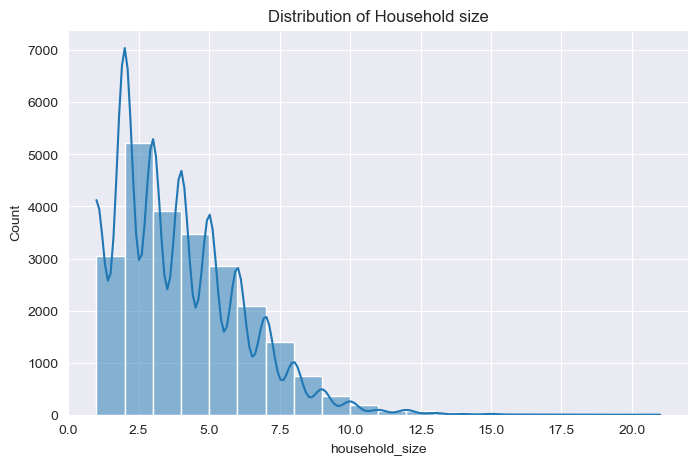

In [16]:
# Distribution of age
plt.figure(figsize=(8,5))
sns.histplot(fin_data_df['household_size'], bins=20, kde=True).set(title = "Distribution of Household size")
plt.show()

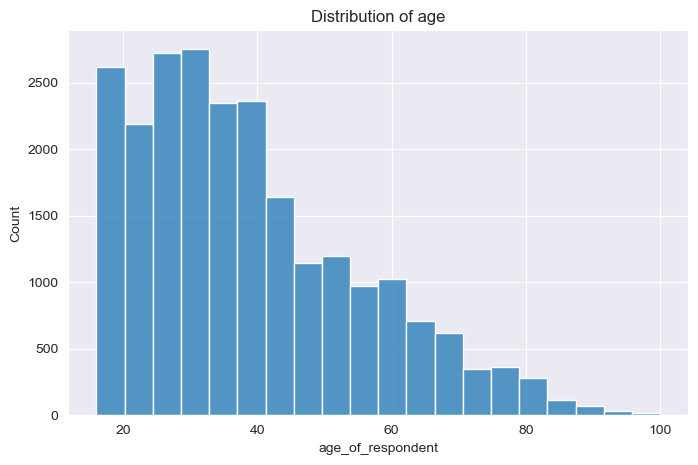

In [17]:
# Getting the distribution of of ages
plt.figure(figsize=(8,5))
sns.histplot(fin_data_df['age_of_respondent'], bins=20,).set(title='Distribution of age');

### Insight from the distributions
1. The distribution of household is skewed to the right indicating that most house has relatively a small number of individuals in the house. <br> From the distribution, we can observe that most households in the dataset have 1 to 8 individuals in a house with a few households having higher number of people from 9 to around 20 people in a household.
2. The distribution of Ages is skewed to the right this indicates that the population of contenent is youthful population with most of the individuals between the ages of 1 and 50 year. We will observe closely to see whether the age of a person has effect on the person using a bank account or not

In [18]:
fin_data_df.columns

Index(['country', 'year', 'bank_account', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'education_level', 'job_type', 'age_group',
       'marital_status_category'],
      dtype='object')

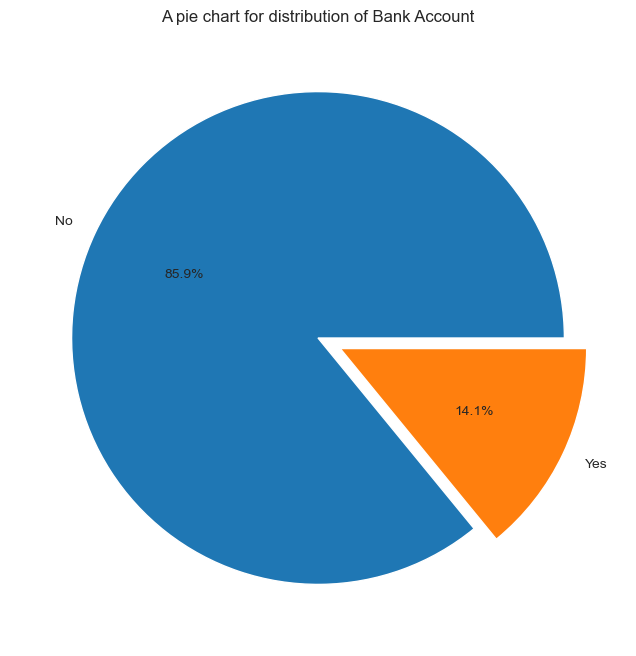

In [24]:
# Checking the distribution of the categorical columns in the dataset
plt.figure(figsize=(8,8))
bank_account = fin_data_df['bank_account'].value_counts()
plt.pie(bank_account, labels=bank_account.index, autopct= '%1.1f%%', explode=[0, 0.1])
plt.title("A pie chart for distribution of Bank Account")
plt.show()

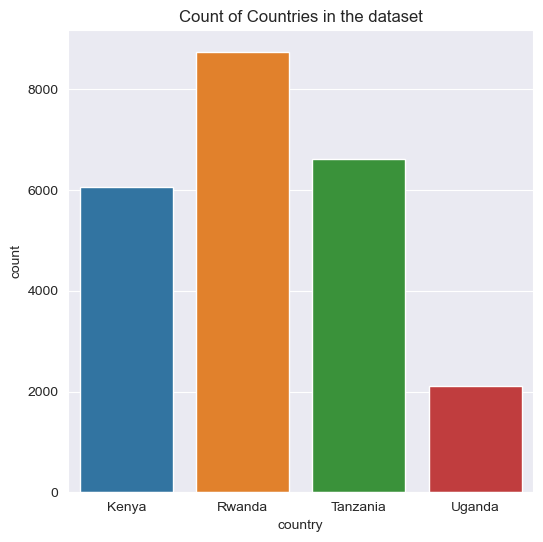

In [26]:
# distribution of countries
plt.figure(figsize = (6,6))
sns.countplot(x='country', data=fin_data_df).set(title='Count of Countries in the dataset');

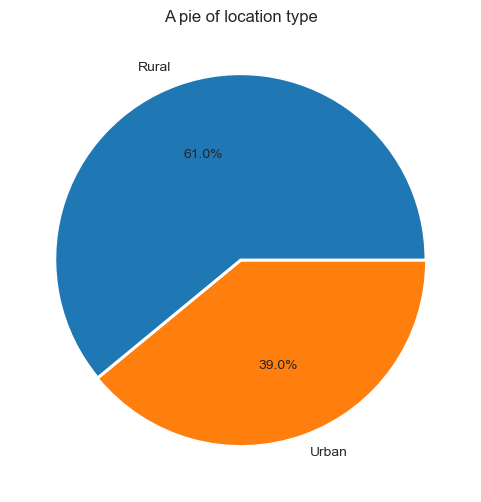

In [31]:
# plot of location type
location = fin_data_df['location_type'].value_counts()
plt.figure(figsize = (6,6))
plt.pie(location, labels=location.index, autopct='%1.1f%%', explode=[0.01, 0])
plt.title('A pie of location type');

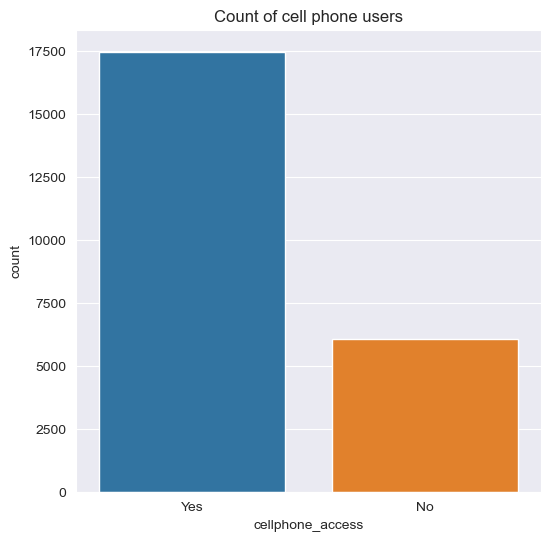

In [33]:
plt.figure(figsize = (6,6))
sns.countplot(x= 'cellphone_access', data=fin_data_df).set(title='Count of cell phone users');


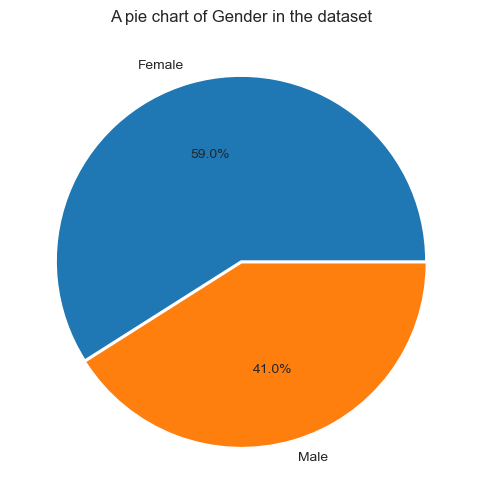

In [36]:
# distribution of gender in the dataset
gender = fin_data_df['gender_of_respondent'].value_counts()
plt.figure(figsize = (6,6))
plt.pie(gender, labels=gender.index, autopct='%1.1f%%', explode=[0,0.01])
plt.title("A pie chart of Gender in the dataset");

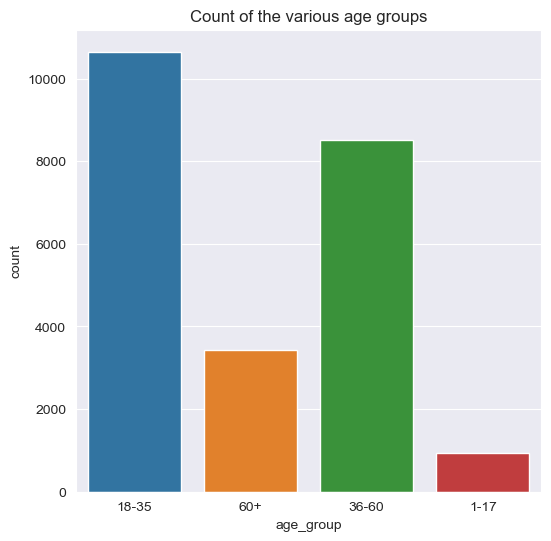

In [37]:
plt.figure(figsize = (6,6))
sns.countplot(x= 'age_group', data=fin_data_df).set(title='Count of the various age groups');